In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv("medical_examination.csv", index_col='id')
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [101]:
# Add 'overweight' column
df['bmi'] = df['weight']/(((df['height'])/100)**2)     
df['overweight'] = [1 if x > 25 else 0 for x in df['bmi']]
df.head()   

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
id,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


In [102]:


df['cholesterol'] = [1 if x > 1 else 0 for x in df['cholesterol']]
df['gluc'] = [1 if x > 1 else 0 for x in df['gluc']]
df.head()


,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
id,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


In [103]:
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])
    

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = None

    # Draw the catplot with 'sns.catplot()'

    # Get the figure for the output
    fig = None

    # Do not modify the next two lines
    fig.savefig("catplot.png")
    return fig



In [104]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])
df_cat


,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [105]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(
        df,
        id_vars=["cardio"],
        value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"],
    )

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat.groupby(
        ["cardio", "variable", "value"], as_index=False
    )

    df = df.dropna().value_counts()
    df_cat.rename(columns={"count": "total"}, inplace=True)

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(
        x="variable", y="total", hue="value", kind="bar", col="cardio", data=df_cat
    )

    # Do not modify the next two lines
    fig.savefig("catplot.png")
    return fig
draw_cat_plot()

UnboundLocalError: local variable 'df' referenced before assignment

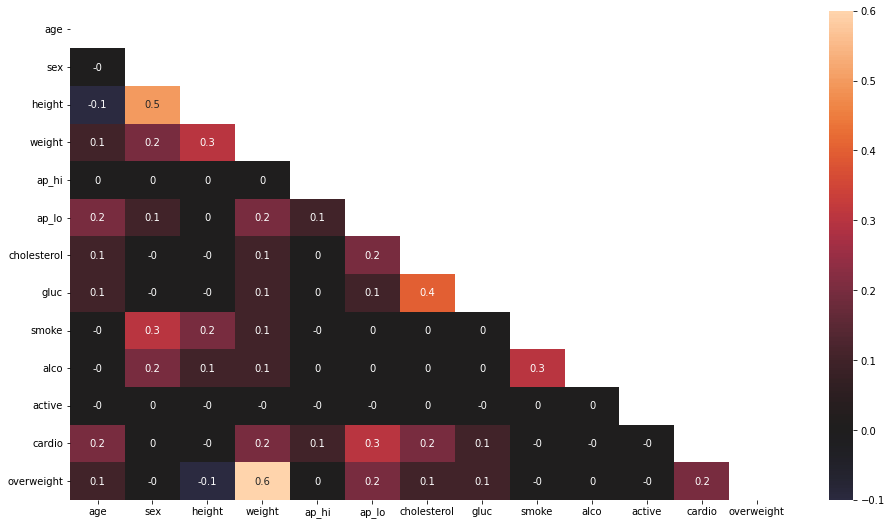

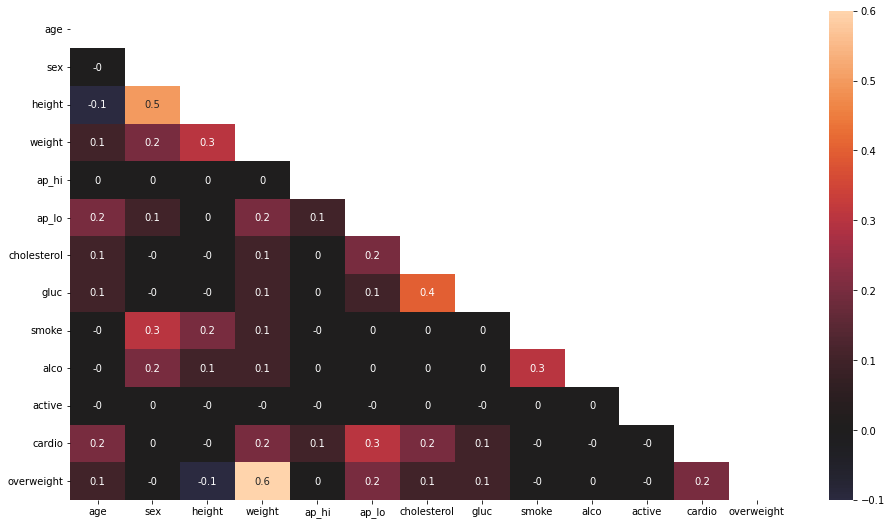

In [ ]:
def draw_heat_map():
    # Clean the data
    df_heat = df.loc[(df['ap_lo'] <= df['ap_hi'])]
    # & 
    #    (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) &
    #    (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]
    #remove bmi column 
    df_heat = df_heat.drop(['bmi'], axis=1)
    # Calculate the correlation matrix
    corr =  round(df_heat.corr(),1)

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    plt.figure(figsize=(16,9))

    # Draw the heatmap with 'sns.heatmap()'
    hm = sns.heatmap(corr, mask = mask, annot = True, center = 0)
    fig = hm.figure
    return fig

    # Do not modify the next two lines
    fig.savefig('heatmap.png')

draw_heat_map()
